- Họ và tên: Phạm Trần Yến Quyên
- MSSV: 22127357
- Lớp: 22CLC02

# FINAL PROJECT - MARKOV CHAIN
### **Chủ đề**: 
1. Từ bảng số liệu trên, xây dựng ma trận chuyển trạng thái P của xích Markov.
2. Với các điều kiện của bài toán đã cho, xác định vector phân phối xác suất ban đầu 𝜋0.
3. Hãy dự báo sự xuống cấp về CSVC của các phòng học tòa nhà I trong vòng 15 năm tới, kể từ năm 2021. 
4. Xác định thời điểm (năm) phải phá hủy để xây lại/ trùng tu tòa nhà I (tất cả phòng học đều ở trạng thái CSVC xấu).
5. Xác định tuổi thọ của tòa nhà I.


### **Các quy trình**:



# == Class `matrix` ==
### **Mục đích**: Hỗ trợ quá trình tính toán Xích Markov.
### **Chức năng các hàm**:
- `__init__`: Khởi tạo một ma trận (dưới dạng list các list).
- `multiply_vector_matrix`: Nhân ma trận với vector truyền vào.
    + Thao tác: 
        + Nếu matrix và vector có số chiều khác nhau (số cột của matrix phải bằng số phần tử của vector).
        + Nếu không: Tính vector kết quả bằng cách lấy tổng của tích của các phần tử của vector với các phần tử của ma trận.
    + Trả về một list chứa kết quả (vector)
- `print_matrix`: 
    + In ma trận: In ma trận theo định dạng dễ đọc.
    + Kiểm tra kiểu dữ liệu: Nếu bất kỳ phần tử nào trong ma trận là chuỗi (sử dụng để trả lỗi như không khả nghịch,...), in ra message lỗi đó nếu có.

In [1]:
class matrix:
    def __init__(self, matrix):
        self.matrix = matrix
    
    def multiply_vector_matrix(self, vector):
        # Nhân ma trận với vector
        if (len(self.matrix[0]) != len(vector)):
            return "Matrix và vector không có cùng số chiều"
        return [sum([self.matrix[i][j] * vector[j] for j in range(len(vector))]) for i in range(len(self.matrix))] 
        
    def print_matrix(self):
        # In lại ma trận để thoát format
        for i in range(len(self.matrix)):
            for j in range(len(self.matrix[0])):
                # Kiểm tra có phải là chữ không
                if type(self.matrix[i][j]) == str:
                    for k in range(len(self.matrix)):
                        for l in range(len(self.matrix[0])):
                            print(self.matrix[k][l], end = '')
                    return
                if j == 0:
                    print("[", end = '')
                print(self.matrix[i][j], end = '')
                if j == len(self.matrix[0]) - 1:
                    print("]")
                else:
                    print(", ", end = '')

# == 1. MA TRẬN CHUYỂN $P$ ==
- Dựa trên thông tin cung cấp, ta có:
    + Cơ sở vật cất có 4 trạng thái: Tốt/Khá/Trung bình/Xấu.
    + Việc chuyển trạng thái chỉ có thể xảy ra đến trạng thái kế cận (Tốt $\nrightarrow$ Trung bình/Xấu, Khá $\nrightarrow$ Xấu). 
    + Không thể đi ngược lại trạng thái CSVS (Xấu $\nrightarrow$ Trung bình,...).
> $\rightarrow$ Vậy có tổng cộng **7 xác suất chuyển trạng thái**, tính toán dựa trên `Bảng kết quả đánh giá xếp loại chất lượng phòng học trong 2 năm 2020 và 2021`:
- **Xác suất chuyển từ trạng thái 1 (Tốt):**
    + Trong năm 2020, có 34 phòng học thuộc CSVC Tốt.    
    + Trong năm 2021, còn 26 phòng học thuộc CSVC Tốt, 8 phòng còn lại chuyển xuống thành CSVC Khá.
> 1. Tốt $\rightarrow$ Tốt $= \frac{26}{34}$
> 2. Tốt $\rightarrow$ Khá $= \frac{8}{34}$

- **Xác suất chuyển từ trạng thái 2 (Khá):**
    + Trong năm 2020, có 12 phòng học thuộc CSVC Khá.
    + Trong năm 2021:
        + 9 phòng giữ trạng thái CSVC Tốt: `số phòng Khá năm 2021` - `số phòng Tốt chuyển xuống Khá` $= 17 - 8$ (phòng).
        + 3 phòng còn lại chuyển xuống thành CSVC Trung bình. 
> 3. Khá $\rightarrow$ Khá $= \frac{9}{12}$
> 4. Khá $\rightarrow$ Trung bình $= \frac{3}{12}$

- **Xác suất chuyển từ trạng thái 3 (Trung bình):**
    + Trong năm 2020, có 3 phòng học thuộc CSVC Trung bình.
    + Trong năm 2021:
        + 2 phòng giữ trạng thái CSVC Trung bình: `số phòng Trung bình năm 2021` - `số phòng Khá chuyển xuống Trung bình` $= 5 - 3$ (phòng).
        + 1 phòng còn lại chuyển xuống thành CSVC Xấu. 
> 5. Trung bình  $\rightarrow$ Trung bình $= \frac{2}{3}$
> 6. Trung bình  $\rightarrow$ Xấu $= \frac{1}{3}$

- **Xác suất chuyển từ trạng thái 4 (Xấu):**
    + Trong năm 2020, có 1 phòng học thuộc CSVC Xấu.
    + Trong năm 2021: `phòng ấy vẫn là thuộc CSVC Xấu` + `số phòng Khá chuyển xuống Trung bình` $= 2$ (phòng).
> 7. Xấu $\rightarrow$ Xấu $= 1.0$

<center><img src="Markov_Chain.png"/></center>
<center>Minh họa Markov Chain của xác suất chuyển trạng thái CSVC</center>

In [2]:
# CSVC - Tốt/Khá/Trung bình/Xấu
csvc_2020 = [34, 12, 3, 1] # Dữ liệu số lượng phòng năm 2020
csvc_2021 = [26, 17, 5, 2] # Dữ liệu số lượng phòng năm 2021

# Tạo ma trận chuyển trạng thái P (4x4)
P = [[0, 0, 0, 0] for i in range(4)]

# Tính xác suất chuyển trạng thái
# Xác suất chuyển từ tráng thái 1 (Tốt)
P[0][0] = 26 / 34  # Tốt -> Tốt
P[1][0] = 8 / 34   # Tốt -> Khá

# Xác suất chuyển từ trạng thái 2 (Khá)
P[1][1] = 9 / 12   # Khá -> Khá 
P[2][1] = 3 / 12   # Khá -> Trung bình

# Xác suất chuyển từ trạng thái 3 (Trung bình)
P[2][2] = 2 / 3    # Trung bình -> Trung bình
P[3][2] = 1 / 3    # Trung bình -> Xấu

# Xác suất chuyển từ trạng thái 4 (Xấu)
P[3][3] = 1        # Xấu -> Xấu 

# Sum(col1) = 1 | Sum(col2) = 1 | Sum(col3) = 1 | Sum(col4) = 1: Vì tổng xác suất chuyển từ một trạng thái bất kỳ bằng 1
# In ma trận chuyển trạng thái
for i in range(4):
    print(f'P[{i}] = {P[i]}')

P[0] = [0.7647058823529411, 0, 0, 0]
P[1] = [0.23529411764705882, 0.75, 0, 0]
P[2] = [0, 0.25, 0.6666666666666666, 0]
P[3] = [0, 0, 0.3333333333333333, 1]


# == 2. VECTOR PHÂN PHỐI XÁC SUẤT BAN ĐẦU $\pi_0$ ==
## Bối cảnh: Năm 2021 là năm bắt đầu của xích Markov.
## Cách tính:
- Phân phối xác suất ban đầu được tính dựa trên số lượng phòng học trong từng trạng thái trên tổng phòng học:
$$\pi_0 = \frac{SPTT_i}{TongSP} $$
- Trong đó:
    + SPTT_i: Số phòng trong trạng thái i ($i \in \{1,2,3,4\}$) năm 2021.
    + TongSP: Tổng số phòng của tòa I.

- Khi đó:
> $$\pi_0 = [\frac{26}{50}, \frac{17}{50}, \frac{5}{50}, \frac{2}{50}]$$
> $$\pi_0 = [0.52, 0.34, 0.1, 0.04]$$

In [3]:
p_0 = [] # Xác suất ban đầu
for r in csvc_2021:
    p_0.append(r / sum(csvc_2021))
    
print(f'p_0 = {p_0}')

p_0 = [0.52, 0.34, 0.1, 0.04]


# == 3. DỰ BÁO CSVC CÁC PHÒNG HỌC TRONG 15 NĂM TỚI ==
- Để tính toán xác suất số phòng học ở các trạng thái CSVC của năm kế tiếp, ta nhân ma trận chuyển $P$ với phân phối xác suất $\pi_n$:
> $$\pi_{n+1} = P \times \pi_n$$
- **Ví dụ:** Để tìm xác suất số phòng học ở các trạng thái CSVC của năm 2022. Ta thực hiện phép nhân ma trận chuyển $P$ với phân phối xác suất $\pi_0$ (xác suất năm 2021), ta có:
\begin{equation}
    \pi_{2022} = 
    \begin{bmatrix}
    \frac{26}{34} & 0            & 0            & 0  \\
    \frac{8}{34}  & \frac{9}{12} & 0            & 0  \\
    0             & \frac{3}{12} & \frac{2}{3} & 0  \\
    0             & 0            & \frac{1}{3} & 1.0\\
    \end{bmatrix} 
    \times
    \begin{bmatrix}
    0.52 \\ 0.34 \\ 0.1 \\ 0.04 \\
    \end{bmatrix}
\end{equation}
- Vậy để ghi chép lại xác suất phân phối 15 năm tiếp theo, ta sẽ thực hiện phép nhân ma trận chuyển $P$ với vector phân phối $\pi_n$ ban đầu 15 lần, hoặc tương đương với việc nhân $P$ với $\pi_0$ và sau đó nhân với kết quả $\pi_1$, lặp lại 15 lần. Điều này có thể được biểu diễn dưới dạng: 
$$\pi_{15} = P * \pi_{14} = P * P * \pi_{13} = ....$$
$$\pi_{15} = P^{15} * \pi_0$$
- Công thức tổng quát khi đó có thể được biểu diễn dưới dạng: 
> $$\pi_t = P^t * \pi_0$$
- Trong đó $P^t$ là ma trận chuyển đổi $P$ sau $t$ lần nhân ma trận.

In [4]:
# Dự đoán số lượng phòng trong 100 năm tới
P = matrix(P) # Ma trận chuyển ban đầu
year_length = 100 # Lấy số phòng dự đoán trong 100 năm tiếp theo

state_distributions_by_room = [] # Lưu trữ phân phối trạng thái qua các năm (sử dụng cho câu 3 và để vẽ biểu đồ)
state_distributions_pi = [] 
p_n = p_0 # Xác suất ban đầu
for i in range(year_length):
    p_n = P.multiply_vector_matrix(p_n) # Nhân ma trận chuyển trạng thái với xác suất trước đó
    state_distributions_pi.append(p_n) # Lưu trữ xác suất phân phối qua các năm
    print(f'p_{2021 + i + 1} = {p_n}')
    # In số lượng phòng dự đoán
    # Làm tròn số lượng phòng dự đoán về số nguyên gần nhất 
    # Riêng trạng thái Xấu được tính bằng cách lấy tổng số phòng trừ đi tổng số phòng của 3 trạng thái còn lại cho tròn 50
    csvc = [round(p_n[j] * sum(csvc_2021)) for j in range(3)] # Lấy số lượng phòng dự đoán bằng phần trăm của trạng thái * tổng số phòng 
    csvc.append(sum(csvc_2021) - sum(csvc)) # Số lượng phòng trạng thái Xấu
    print(f'csvc_{2021 + i + 1} = {csvc}')
    state_distributions_by_room.append(csvc) # Lưu trữ xác suất phân phối phòng từng trạng thái qua các năm



p_2022 = [0.3976470588235294, 0.3773529411764706, 0.15166666666666667, 0.07333333333333333]
csvc_2022 = [20, 19, 8, 3]
p_2023 = [0.30408304498269895, 0.3765787197231834, 0.19544934640522876, 0.12388888888888888]
csvc_2023 = [15, 19, 10, 6]
p_2024 = [0.2325340932220639, 0.3539829915530226, 0.22444424420094833, 0.18903867102396513]
csvc_2024 = [12, 18, 11, 9]
p_2025 = [0.17782018893451942, 0.3202011479523114, 0.23812524402222118, 0.2638534190909479]
csvc_2025 = [9, 16, 12, 13]
p_2026 = [0.13598014447933837, 0.2819909054194146, 0.23880044966955866, 0.3432285004316883]
csvc_2026 = [7, 14, 12, 17]
p_2027 = [0.10398481636655287, 0.24348850717734644, 0.22969802613455942, 0.42282865032154116]
csvc_2027 = [5, 12, 11, 22]
p_2028 = [0.07951780075089336, 0.20708339599866932, 0.21400414421737624, 0.49939465903306096]
csvc_2028 = [4, 10, 11, 25]
p_2029 = [0.06080772998597727, 0.17402261776391809, 0.19444027847791814, 0.5707293737721864]
csvc_2029 = [3, 9, 10, 28]
p_2030 = [0.04650002881280615, 0.144

# == Kết quả dự báo sự xuống cấp về CSVC trong vòng 15 năm ==


| Số phòng học trong năm | Trạng thái 1 | Trạng thái 2 | Trạng thái 3 | Trạng thái 4 |
|------------------------|--------------|--------------|--------------|--------------|
| 2021                   | 26           | 17           | 5            | 2            |
| 2022                   | 20           | 19           | 8            | 3            |
| 2023                   | 15           | 19           | 10           | 6            |
| 2024                   | 12           | 18           | 11           | 9            |
| 2025                   | 9            | 16           | 12           | 13           |
| 2026                   | 7            | 14           | 12           | 17           |
| 2027                   | 5            | 12           | 11           | 22           |
| 2028                   | 4            | 10           | 11           | 25           |
| 2029                   | 3            | 9            | 10           | 28           |
| 2030                   | 2            | 7            | 9            | 32           |
| 2031                   | 2            | 6            | 8            | 34           |
| 2032                   | 1            | 5            | 7            | 37           |
| 2033                   | 1            | 4            | 6            | 39           |
| 2034                   | 1            | 3            | 5            | 41           |
| 2035                   | 1            | 3            | 4            | 42           |

<!-- Bên dưới dùng cho chuyển đổi HTML>
<!-- <table>
  <thead>
    <tr>
      <th>Số phòng học trong năm</th>
      <th>Trạng thái 1</th>
      <th>Trạng thái 2</th>
      <th>Trạng thái 3</th>
      <th>Trạng thái 4</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2021</td>
      <td>26</td>
      <td>17</td>
      <td>5</td>
      <td>2</td>
    </tr>
    <tr>
      <td>2022</td>
      <td>20</td>
      <td>19</td>
      <td>8</td>
      <td>3</td>
    </tr>
    <tr>
      <td>2023</td>
      <td>15</td>
      <td>19</td>
      <td>10</td>
      <td>6</td>
    </tr>
    <tr>
      <td>2024</td>
      <td>12</td>
      <td>18</td>
      <td>11</td>
      <td>9</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>9</td>
      <td>16</td>
      <td>12</td>
      <td>13</td>
    </tr>
    <tr>
      <td>2026</td>
      <td>7</td>
      <td>14</td>
      <td>12</td>
      <td>17</td>
    </tr>
    <tr>
      <td>2027</td>
      <td>5</td>
      <td>12</td>
      <td>11</td>
      <td>22</td>
    </tr>
    <tr>
      <td>2028</td>
      <td>4</td>
      <td>10</td>
      <td>11</td>
      <td>25</td>
    </tr>
    <tr>
      <td>2029</td>
      <td>3</td>
      <td>9</td>
      <td>10</td>
      <td>28</td>
    </tr>
    <tr>
      <td>2030</td>
      <td>2</td>
      <td>7</td>
      <td>9</td>
      <td>32</td>
    </tr>
    <tr>
      <td>2031</td>
      <td>2</td>
      <td>6</td>
      <td>8</td>
      <td>34</td>
    </tr>
    <tr>
      <td>2032</td>
      <td>1</td>
      <td>5</td>
      <td>7</td>
      <td>37</td>
    </tr>
    <tr>
      <td>2033</td>
      <td>1</td>
      <td>4</td>
      <td>6</td>
      <td>39</td>
    </tr>
    <tr>
      <td>2034</td>
      <td>1</td>
      <td>3</td>
      <td>5</td>
      <td>41</td>
    </tr>
    <tr>
      <td>2035</td>
      <td>1</td>
      <td>3</td>
      <td>4</td>
      <td>42</td>
    </tr>
  </tbody>
</table> -->


# == Vẽ biểu đồ biểu diễn phân phối trạng thái qua các năm 


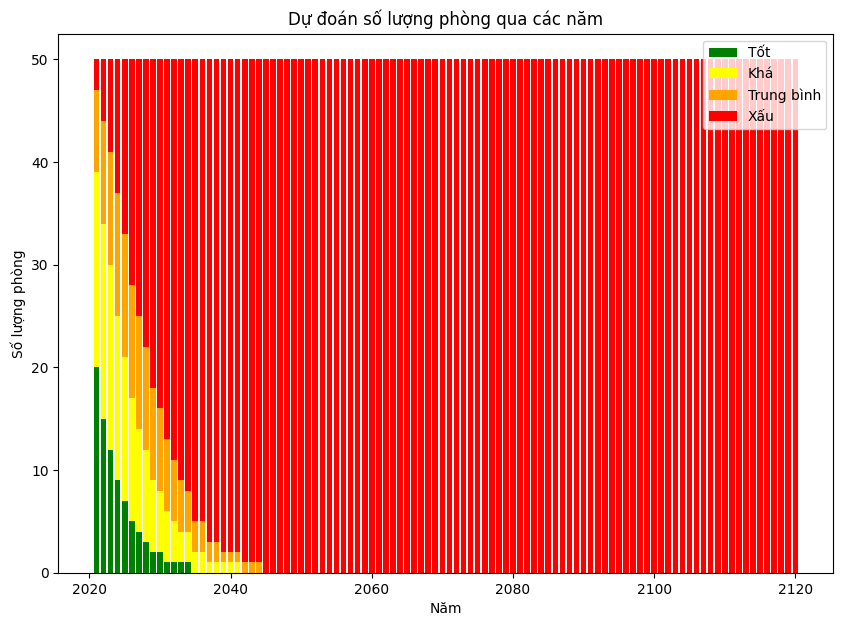

In [5]:
import matplotlib.pyplot as plt

# Chuẩn bị data vẽ đồ thị
years_labels = [2021 + i for i in range(len(state_distributions_by_room))] # Năm
good = [year[0] for year in state_distributions_by_room] # Tốt
fair = [year[1] for year in state_distributions_by_room] # Khá
average = [year[2] for year in state_distributions_by_room] # Trung bình
poor = [year[3] for year in state_distributions_by_room] # Xấu

plt.figure(figsize=(10, 7))
plt.bar(years_labels, good, label='Tốt', color='green')
plt.bar(years_labels, fair, bottom=good, label='Khá', color='yellow')
# bottom: Vì số lượng phòng là tổng toàn diện (=50) nên ta phải để các số lượng phòng chồng lên nhau, 
# nên tính tổng số lượng phòng trước đó (zip(i,j,k) để lấy đúng tổng số lượng phòng trước đó theo đúng năm)
plt.bar(years_labels, average, bottom=[i+j for i,j in zip(good, fair)], label='Trung bình', color='orange') 
plt.bar(years_labels, poor, bottom=[i+j+k for i,j,k in zip(good, fair, average)], label='Xấu', color='red')
plt.legend()

plt.xlabel('Năm')
plt.ylabel('Số lượng phòng')
plt.title('Dự đoán số lượng phòng qua các năm')
plt.show()

# == 4. XÁC ĐỊNH NĂM PHẢI TRÙNG TU TÒA I ==
- Điều kiện xây lại/ trùng tu tòa nhà I: Tất cả phòng học đều ở trạng thái CSVC Xấu.
- Vậy bài toán đạt điều kiện khi: $\pi_n = [0,0,0,1]$ **HAY** `phân phối phòng học` là $[0,0,0,50]$

In [6]:
# Xác định năm phải trùng tu tòa I (tất cả phòng học đều ở trạng thái CSVC xấu HAY state_distribution = [0, 0, 0, 50])
for i in range(len(state_distributions_by_room)):
    if state_distributions_by_room[i][3] == 50:
        print(f'Năm phải trùng tu tòa I: {2022 + i}')
        break

Năm phải trùng tu tòa I: 2046


# == 5. XÁC ĐỊNH TUỔI THỌ TÒA I ==
- Tuổi thọ của tòa nhà I sẽ được tính từ năm xây (năm 2000) tới thời điểm đầu tiên đạt điều kiện phải xây lại/ trùng tu tòa nhà I.

In [7]:
# Xác định tuổi thọ tòa I
for i in range(len(state_distributions_by_room)): # i giữ giá trị cộng vào 2022 để ra năm cần tìm
    if state_distributions_by_room[i][3] == 50: 
        print(f'Tuổi thọ tòa I: {2022 + i - 2000} năm') # Tính từ năm 2000
        break

Tuổi thọ tòa I: 46 năm
